# ⚠️ EDIT "OPEN IN COLAB" BADGE PRIOR TO DOING ASSIGNMENT

<a target="_blank" href="https://colab.research.google.com/github/BenjaminHerrera/MAT422/blob/main/HW_1.3.ipynb">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# HW 1.3
# Benjamin Herrera
# 8 SEP 2024

# ⚠️ Run these commands prior to running anything

In [1]:
!pip install scipy
!pip install matplotlib
!pip install numpy

## 📷 QR Decomposition 

QR Decomposition is a great way to solve the linear least squares problem which very useful for regression as well. The first thing to do is to get an orthonormal basis of a matrix using the Gram-Schmidt Process.  

In order to get the QR decomposition, let's define two $n \times m$ matrix, $M$ and $Q$. The QR decomposition should look like this:

$$M = QR$$

$R$ is of shape $m \times m$ in this case. In other words, the $R$ matrix contain the results of projecting $Q$ vectors to $A$ vectors. Additionally, the multiplication of $Q$ to its transpose results in an identity matrix of size $m \times m$. Below is a code example of using numpy to create a QR decomposition of any matrix.

In [4]:
# Import NumPy
import numpy as np

# Create a random matrix
A = np.random.rand(4,5)

# Print the random matrix
print("Original A:")
print(A)

# Create a QR decomposition
A_qr = np.linalg.qr(A)

# Print the decomposition 
Q, R = A_qr
print()
print("Q matrix:")
print(Q)
print()
print("R matrix:")
print(R)
print()


Original A:
[[0.43367981 0.44506527 0.50482306 0.97565165 0.03519348]
 [0.71587943 0.37236707 0.71569468 0.20042251 0.10428023]
 [0.41059998 0.05003121 0.87068487 0.60526353 0.43830648]
 [0.51290804 0.94330049 0.80965405 0.12165562 0.84278404]]

Q matrix:
[[-0.40756995  0.11867792  0.1749569  -0.888365  ]
 [-0.67277963 -0.37105379  0.52722948  0.36292662]
 [-0.38587965 -0.46874372 -0.79348872 -0.04185544]
 [-0.48202822  0.79278873 -0.24858562  0.27810074]]

R matrix:
[[-1.06406228 -0.90591969 -1.41351118 -0.82468679 -0.65988066]
 [ 0.          0.63903739  0.02810666 -0.1458455   0.42817939]
 [ 0.          0.         -0.42648936 -0.23414597 -0.49615828]
 [ 0.          0.          0.         -0.78549716  0.22261477]]



## 🟥 Least-Squares Problems

The least squares problem (LSP) is where we have matrix $A$ that is size $n \times m$ and a vector $b$ in $\Reals^n$. We want to find a matrix $A$ where:

$$\min_{x\isin \Reals^m} ||Ax -b||$$

To solve this problem, we need to define how inference is conducted: 

$$\^{y_i} = \sum^m_{j=1}x_j a_{i,j}$$

where $\^{y_i}$ is the model's prediction of the $i$th sample in the dataset represented as $x_i$. The parameters of this model are represented as $a_{i,j}$. 

To see how good the model's prediction is, we have to define a loss function:

$$\sum_{i=1}^{n}(\^{y_i} - b_i)^2$$

In other words, this loss function is the mean squared error (MSE) object function.

To solve this, we simply use the normal equations solution, defined as:

$$A^{T}Ax=A^{T}b$$

We can also use QR decomposition to solve this issue via the following form:

$$Rx = Q^T b$$

The following is a NumPy example of this:

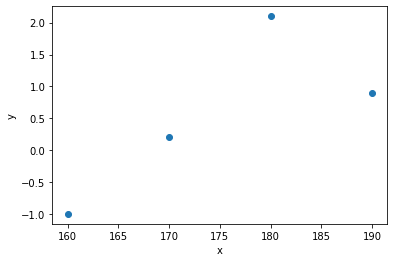

In [34]:
# Create a random X and Y dataset
x = np.array([160, 170, 190, 180])
y = np.array([-1, 0.2, 0.9, 2.1])

# Show the dataset
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

C:\Users\BenHe\AppData\Local\Temp\ipykernel_9816\781373059.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m, c = np.linalg.lstsq(A, y)[0]


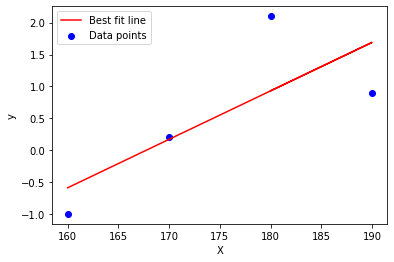

In [38]:
# Solve with numpy
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y)[0]

# Plot the model predictions and the ground truth of the dataset
plt.plot(x, m*x + c, "r-", label="Best fit line")
plt.scatter(x, y, color='blue', label='Data points')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


## 🤗 Linear Regression

To make the regression even more efficient and accurate, we can add a bias to the calculations. Originally, we defined inference as:

$$\^{y_i} = \sum^m_{j=1}x_j a_{i,j}$$

We can add a bias by doing this:

$$\^{y_i} = \beta_0 + \sum^m_{j=1}x_j a_{i,j}$$

This make the least square problems into:

$$\min_{\beta}||y-A\beta||^2$$